<a href="https://colab.research.google.com/github/marawan45/Diabetes-prediction-/blob/main/_cv_task001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="f61gWgmG9Ap0dsR3lpWh")
project = rf.workspace("buildx").project("weapon-detection-7kro8")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Weapon-Detection--2 in yolov11:: 100%|██████████| 19058/19058 [00:03<00:00, 6309.38it/s]


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
!yolo task= detect mode= train data=/content/Weapon-Detection--2/data.yaml model=yolo11n.pt epochs=10 imgsz=640 batch=32

100% 5.35M/5.35M [00:00<00:00, 97.3MB/s]
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Weapon-Detection--2/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

In [ ]:
from IPython.display import Image, display

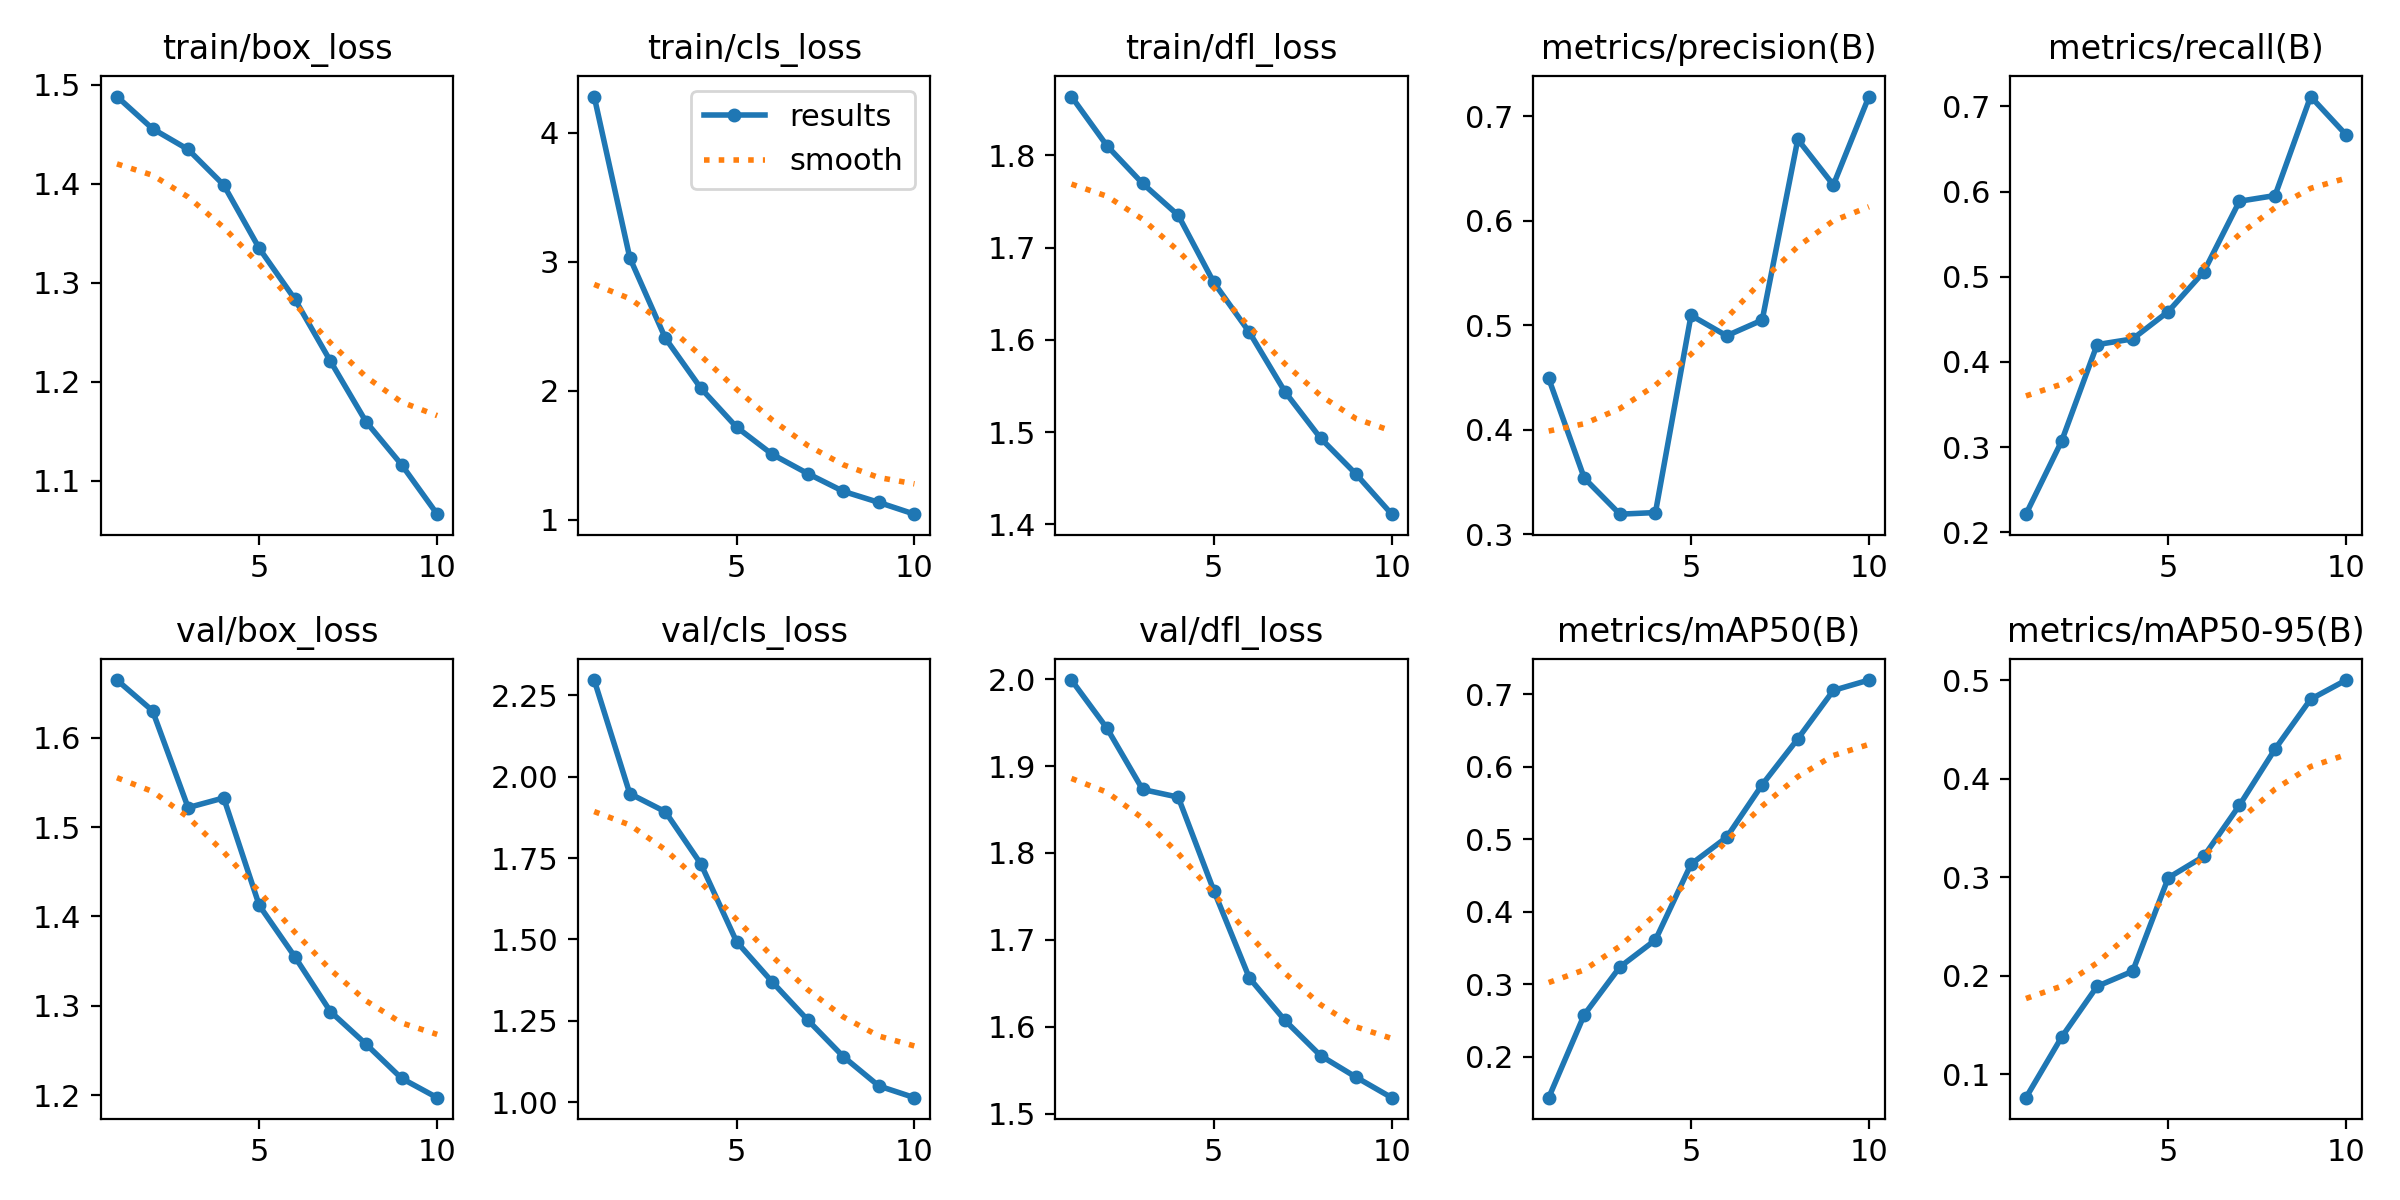

In [ ]:
display(Image(filename=f"/content/runs/detect/train/results.png", width=1000))

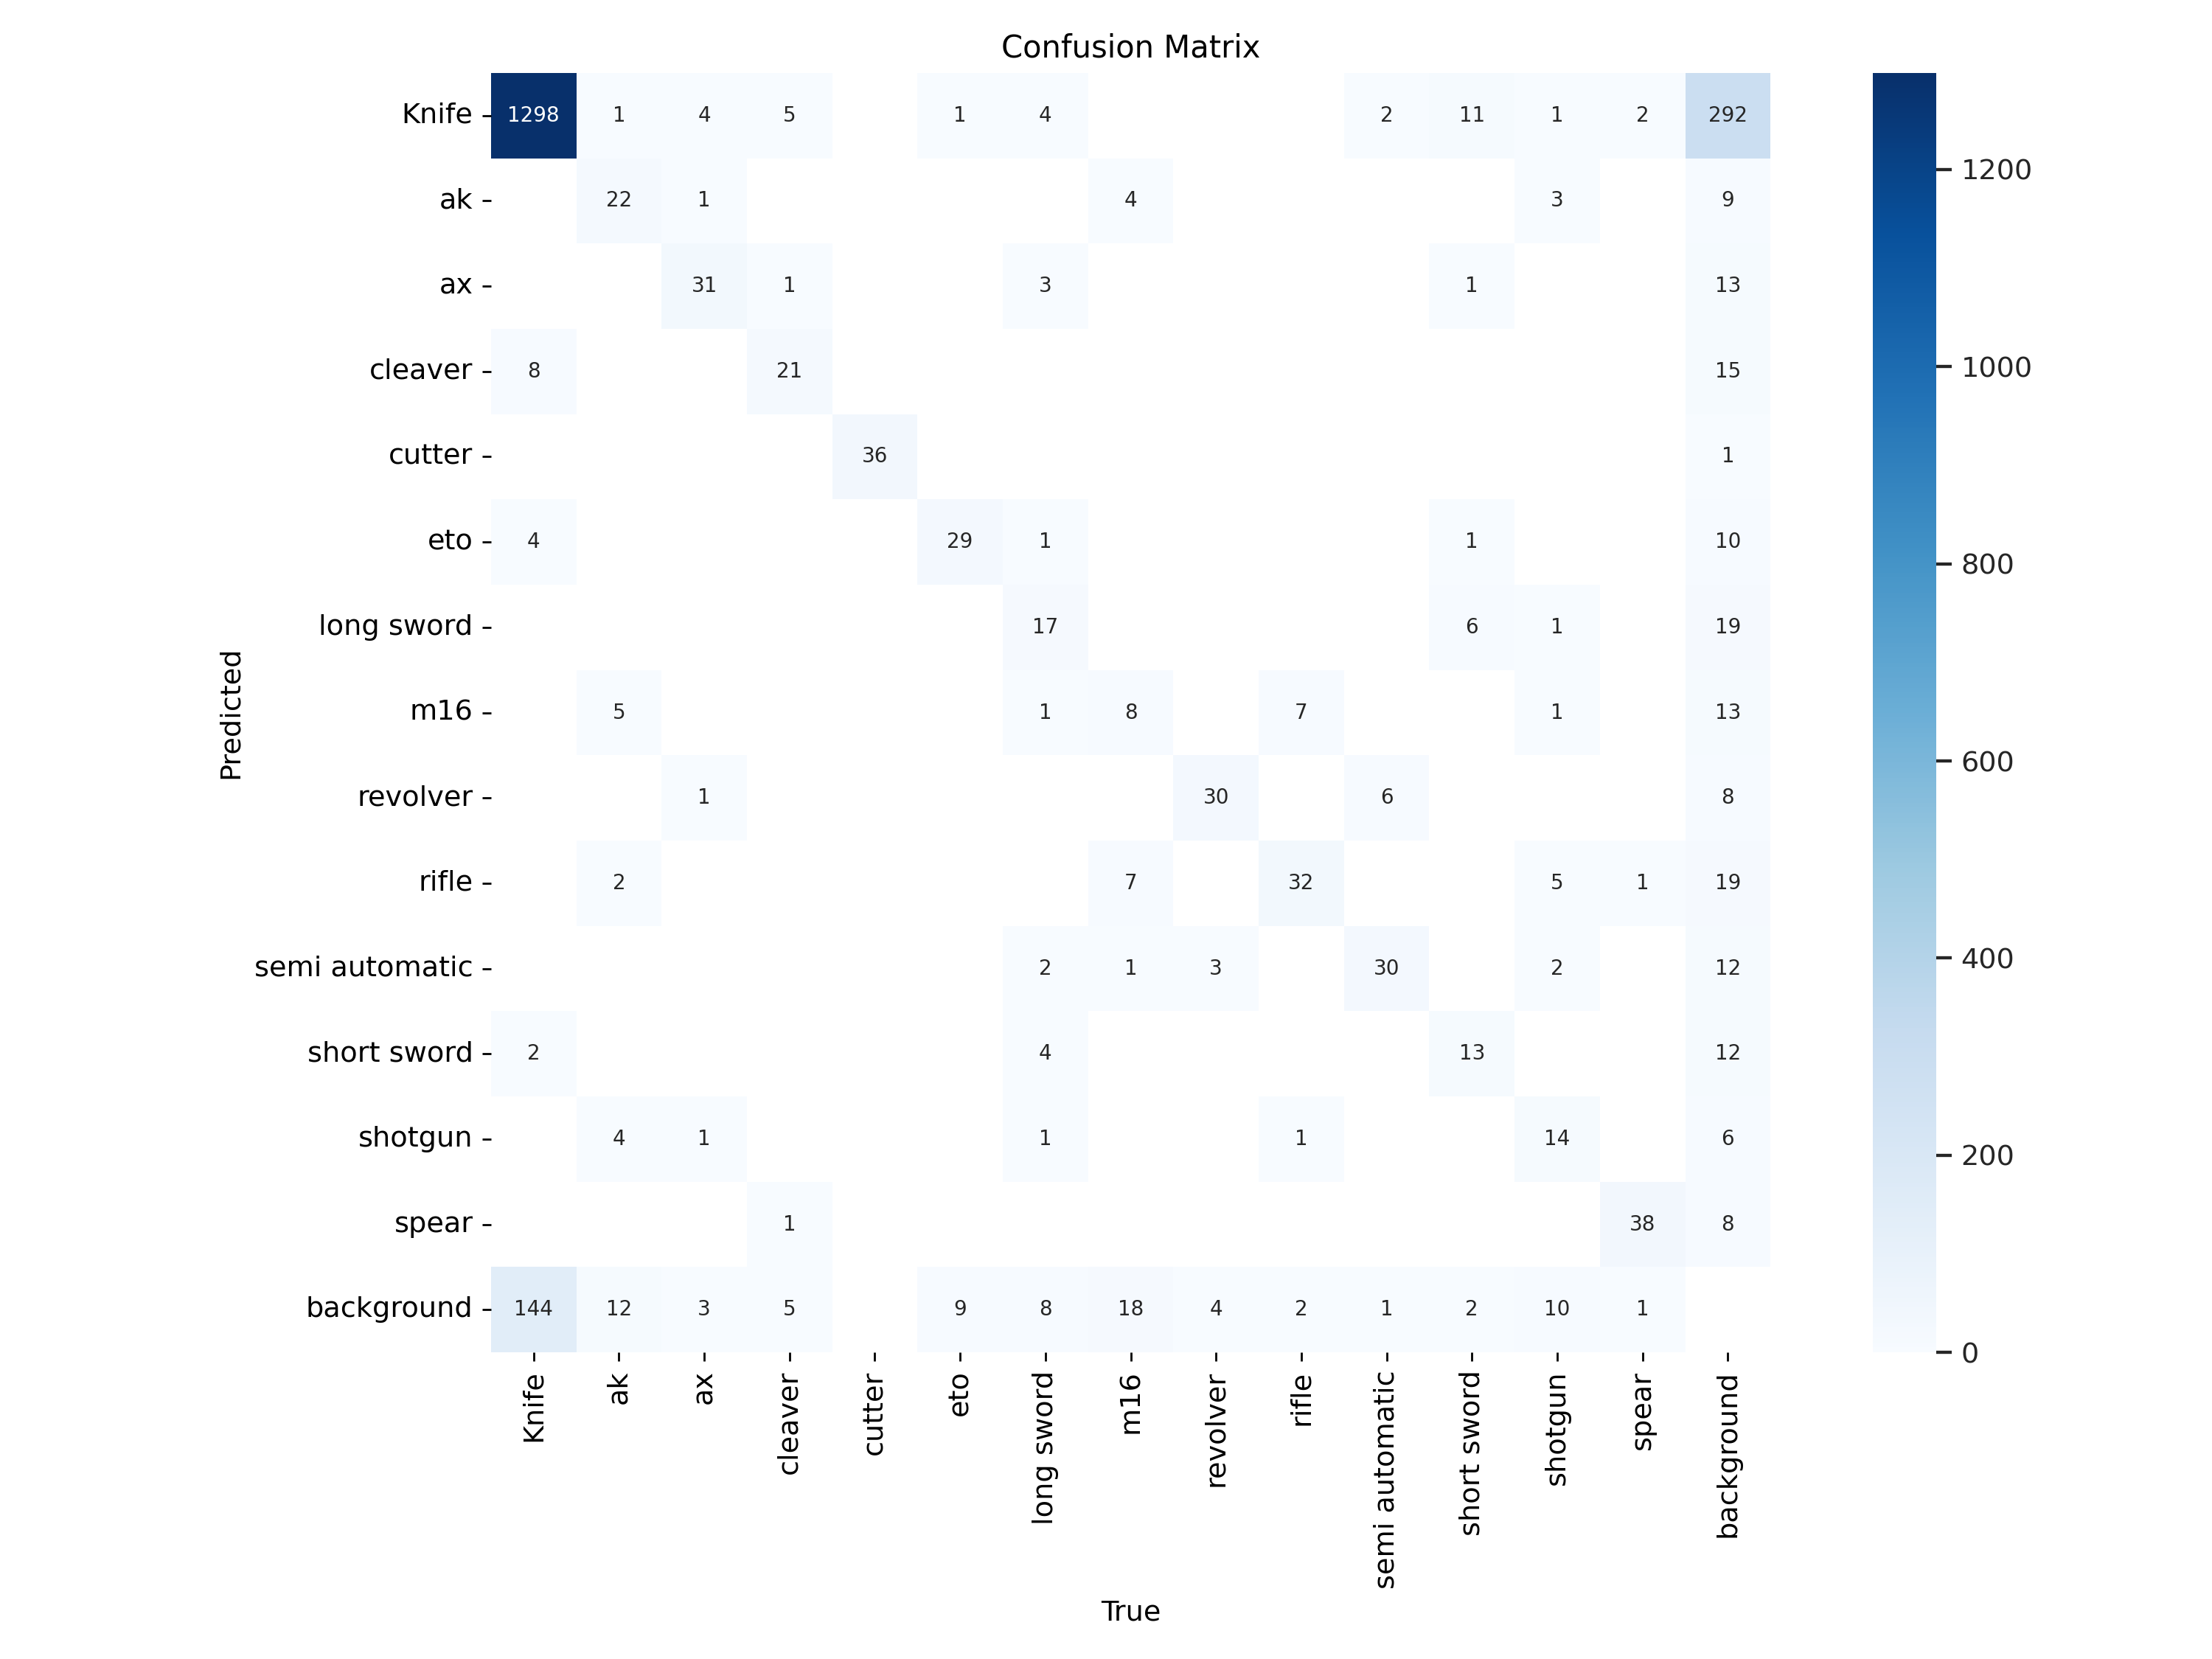

In [ ]:
display(Image(filename=f"/content/runs/detect/train/confusion_matrix.png", width=1000))

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=/content/Weapon-Detection--2/test/images

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,882 parameters, 0 gradients, 6.3 GFLOPs

image 1/983 /content/Weapon-Detection--2/test/images/09QGEI62WX5A_jpg.rf.dce6620da5d17b3e52e0324905dabd6d.jpg: 640x640 1 Knife, 12.2ms
image 2/983 /content/Weapon-Detection--2/test/images/0GXLS8TXBIBY_jpg.rf.b7aa92276858d82f63f2e64d641547f2.jpg: 640x640 1 Knife, 9.1ms
image 3/983 /content/Weapon-Detection--2/test/images/0Y7VH7ZMLYN7_jpg.rf.be0c613f9d6c75d5cfc9a8fbbc565fa9.jpg: 640x640 1 Knife, 8.3ms
image 4/983 /content/Weapon-Detection--2/test/images/10027_bmp_jpg.rf.0ed5d6c1c7fbc41a87e50c018654e0c8.jpg: 640x640 1 Knife, 8.4ms
image 5/983 /content/Weapon-Detection--2/test/images/10040_bmp_jpg.rf.8490c3b98e5de5d7140a59567a243c9d.jpg: 640x640 1 Knife, 8.1ms
image 6/983 /content/Weapon-Detection--2/test/images/10045_bmp_jpg.rf.3165f7c4f229e21a933db9b525e32dea.jpg: 640x640 1 Knife, 8.1ms
image 7/983 /content/Weapon-Detection-

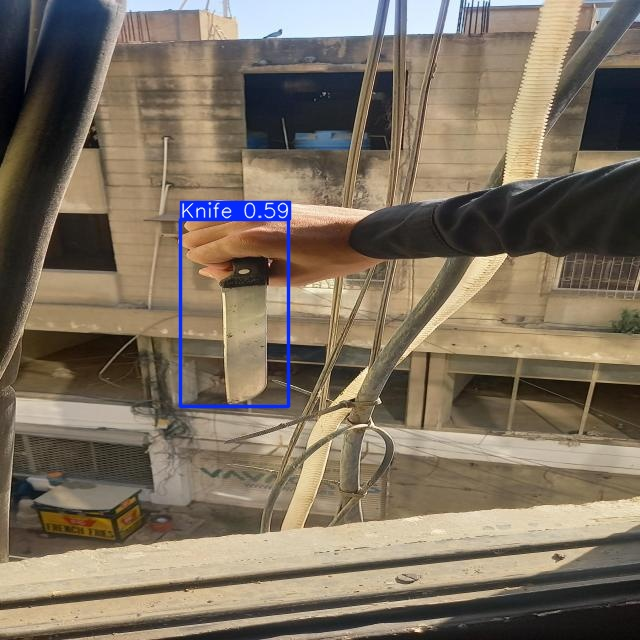

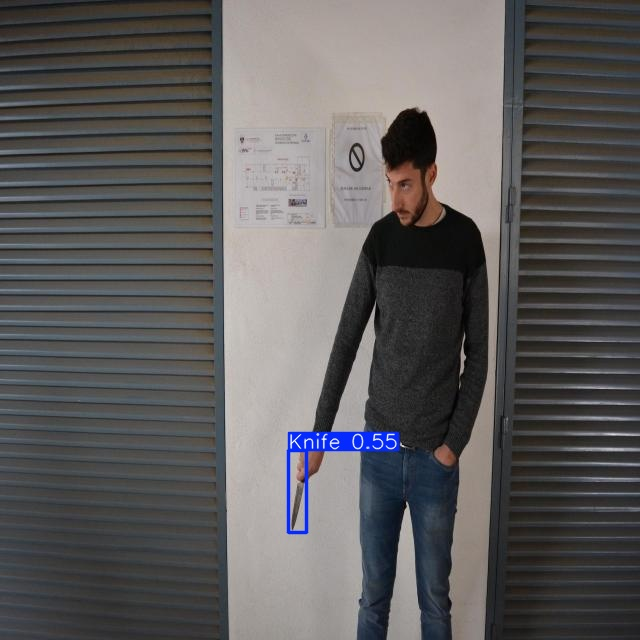

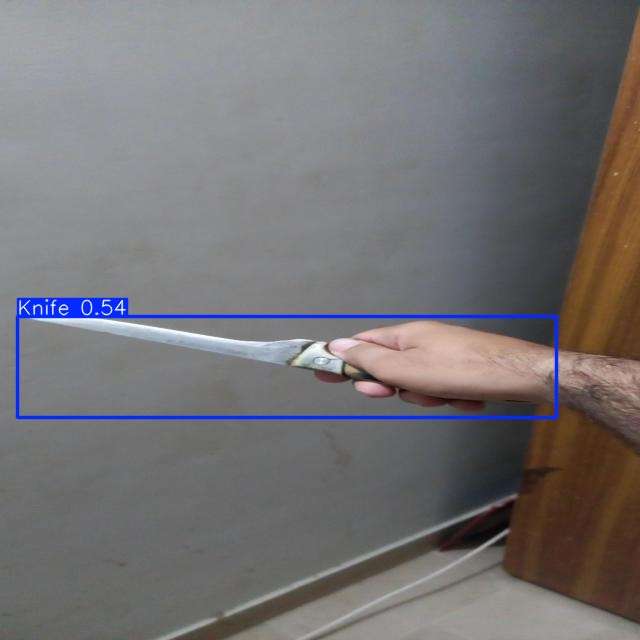

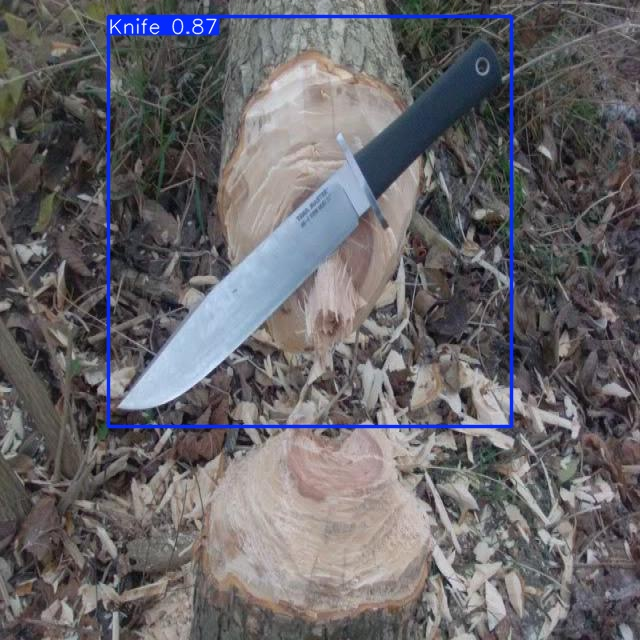

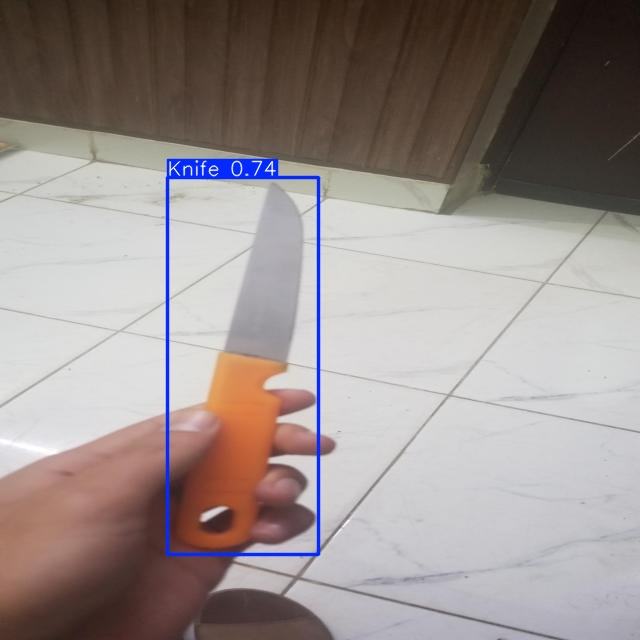

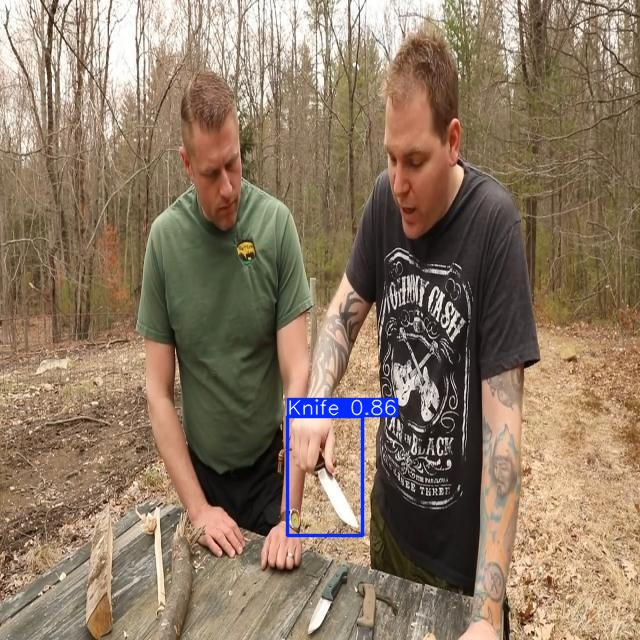

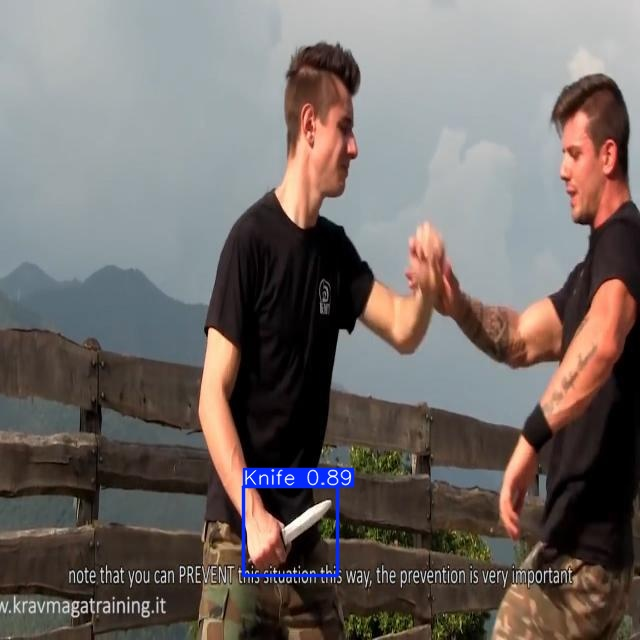

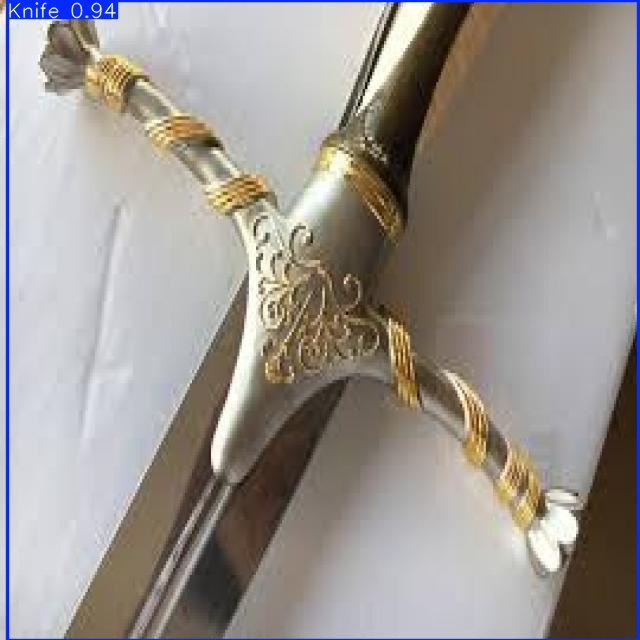

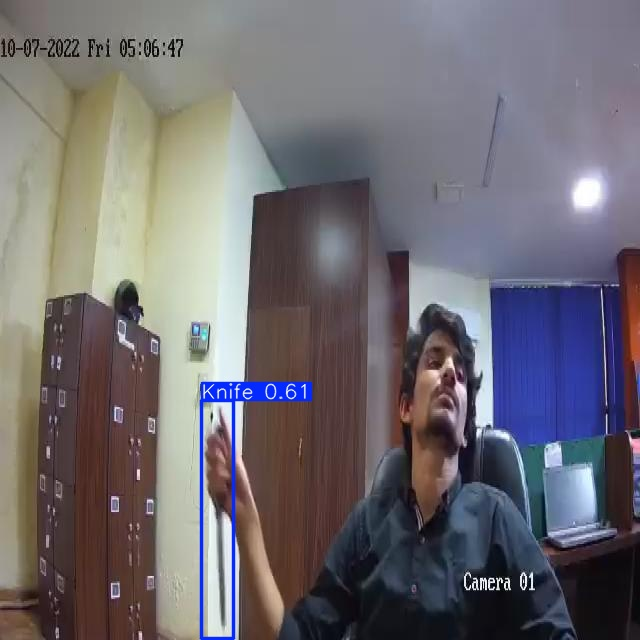

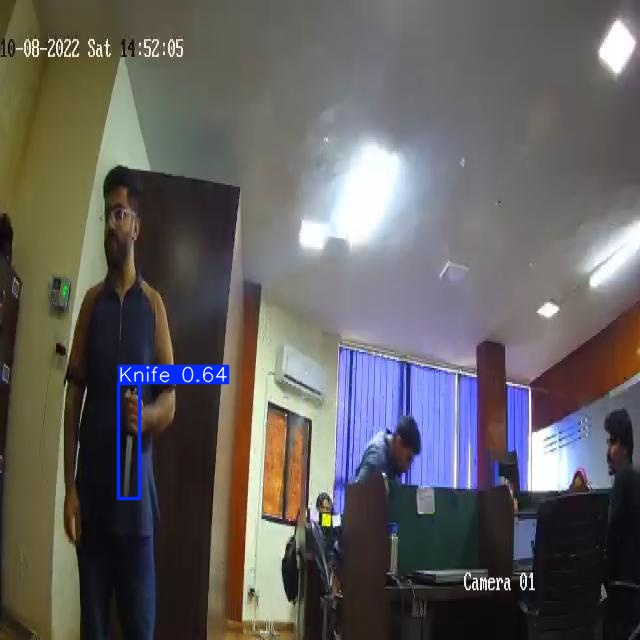

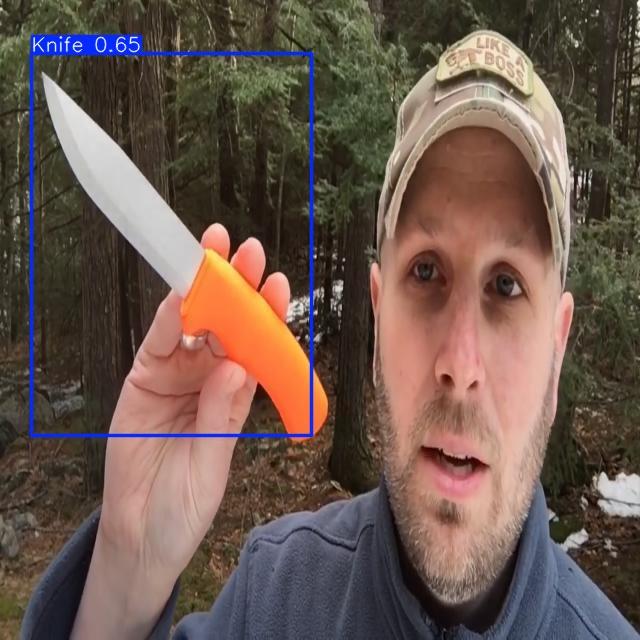

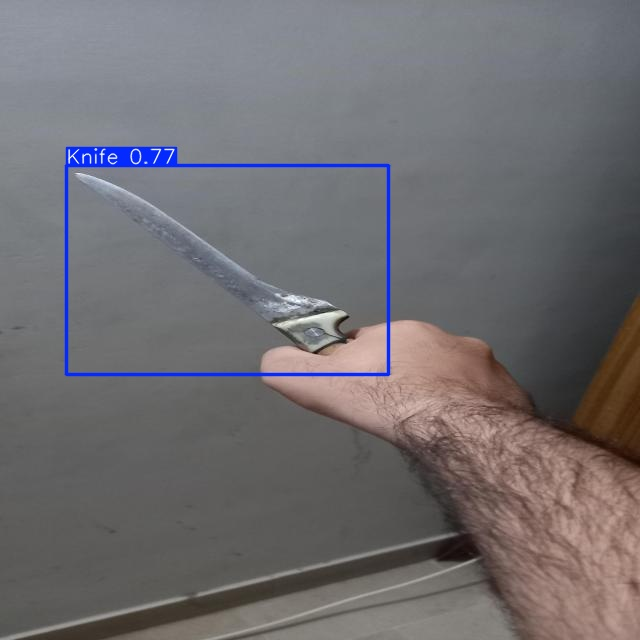

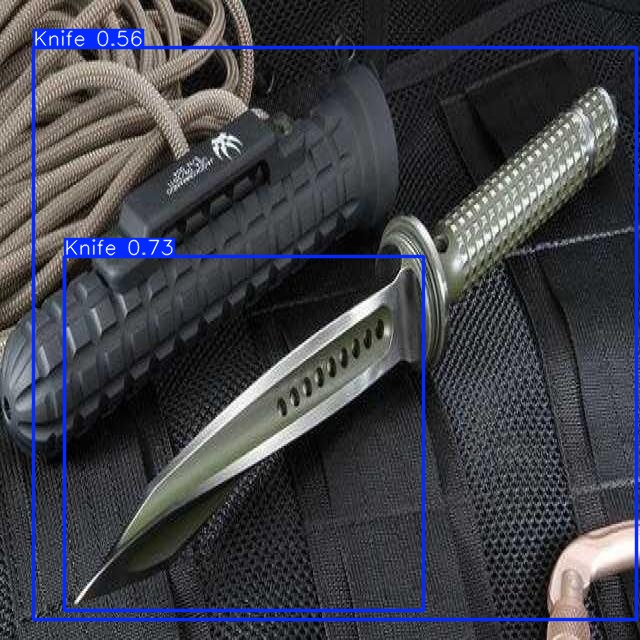

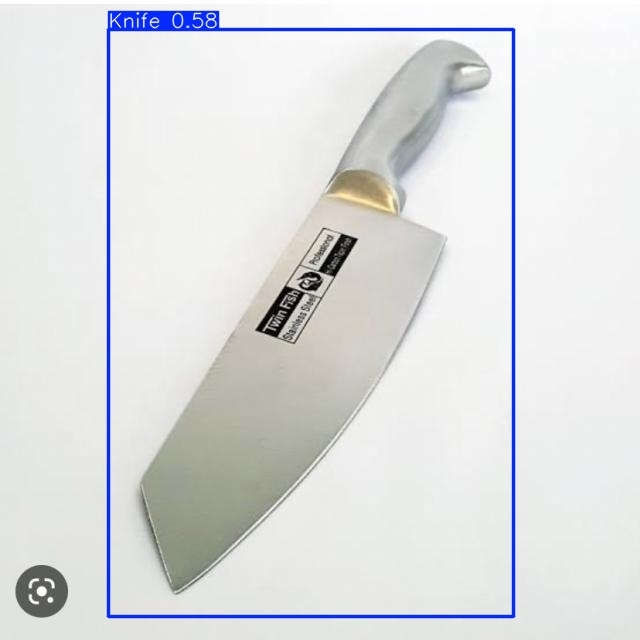

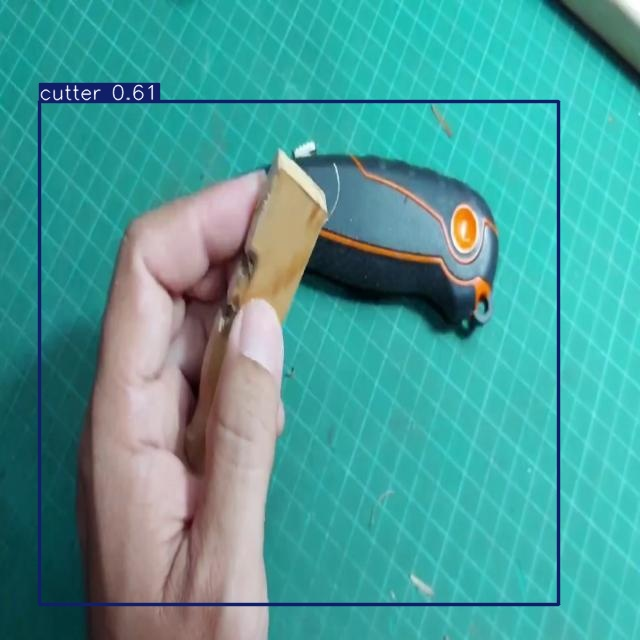

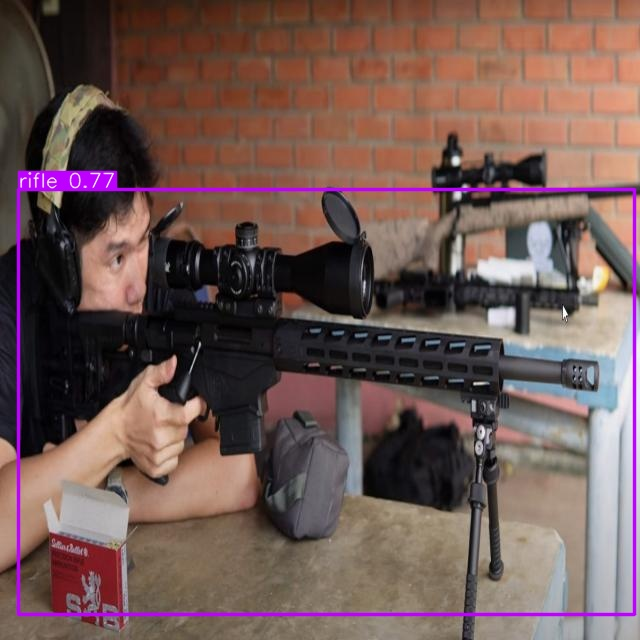

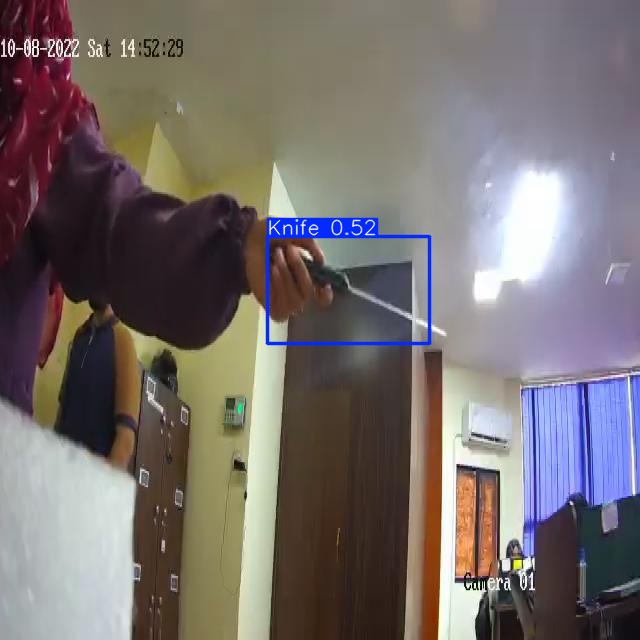

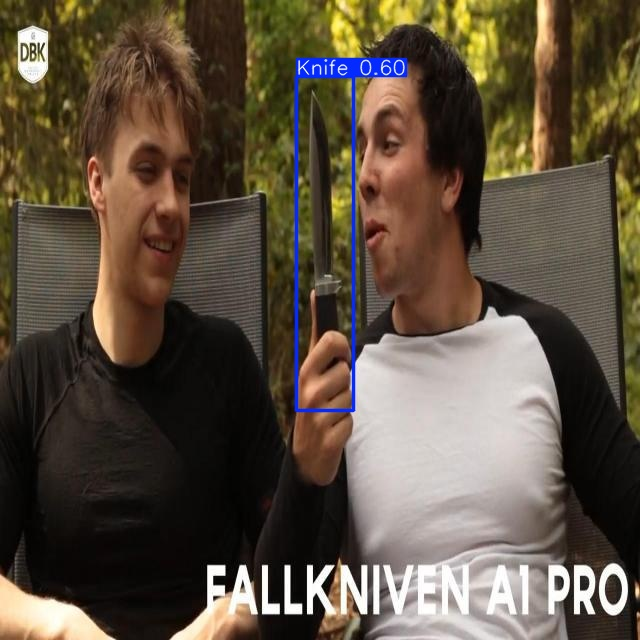

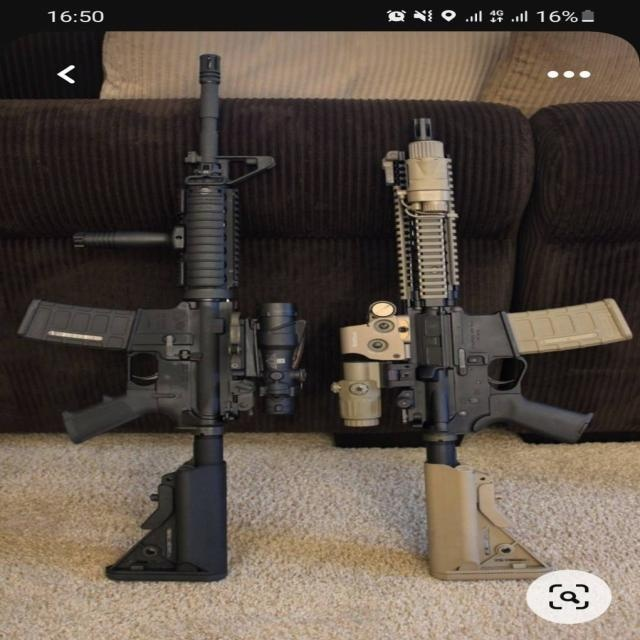

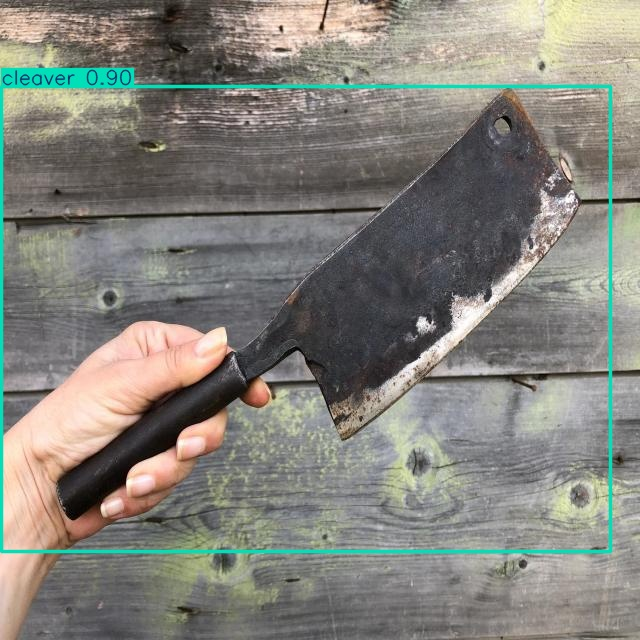

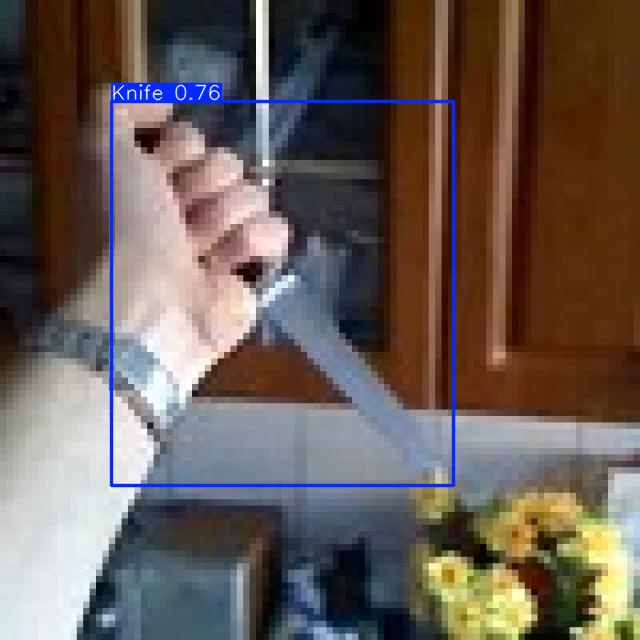

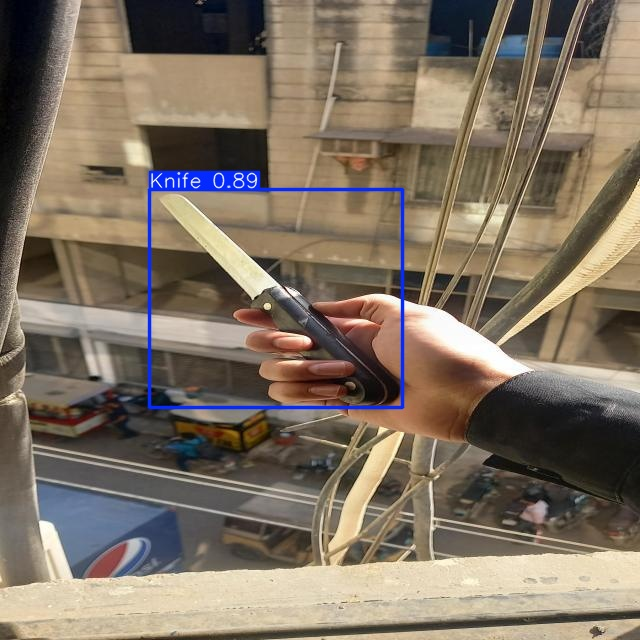

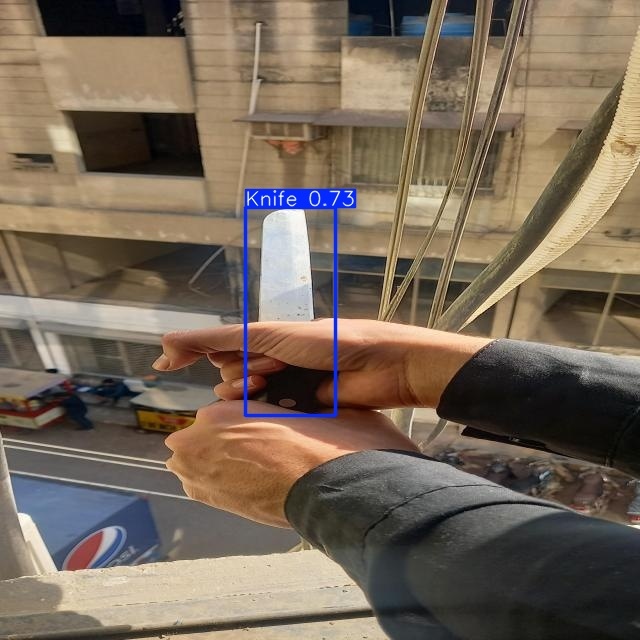

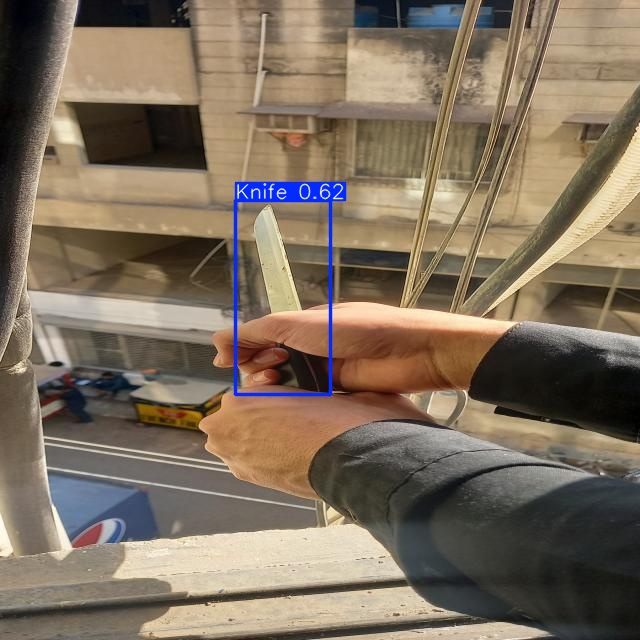

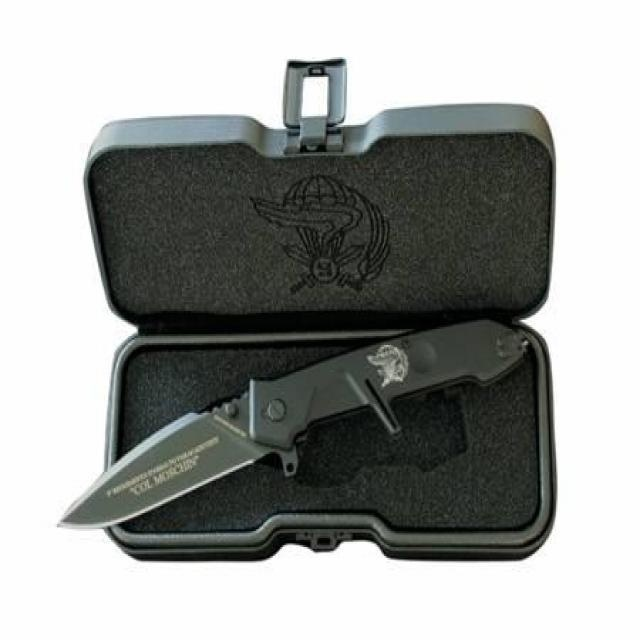

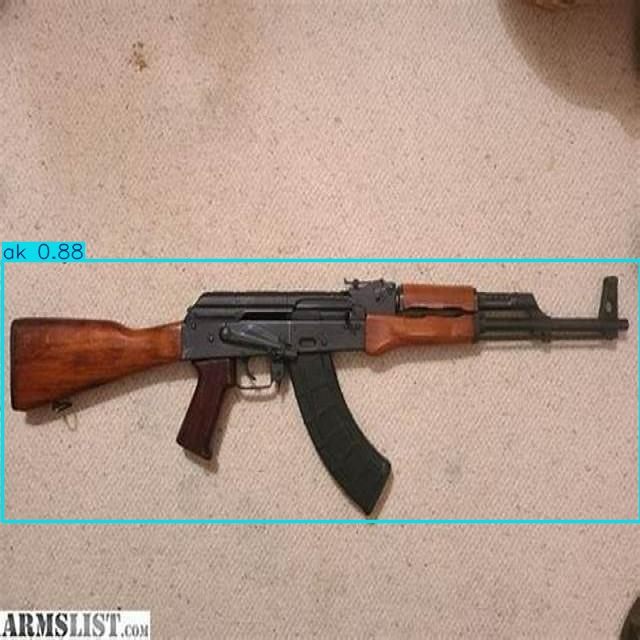

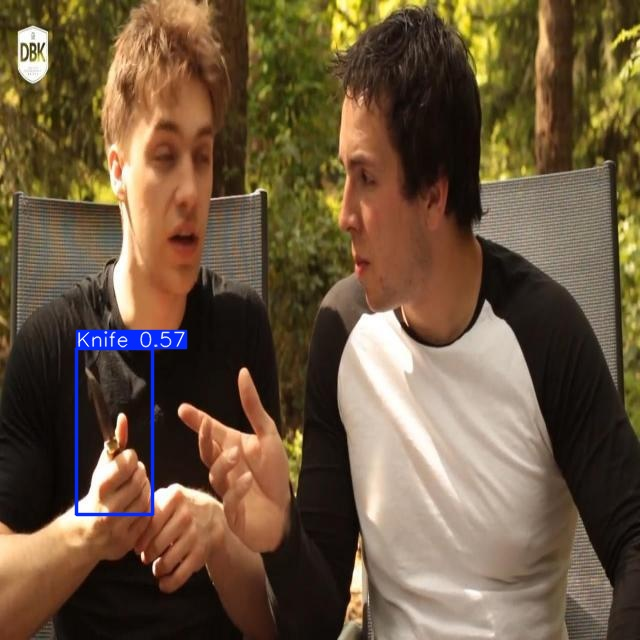

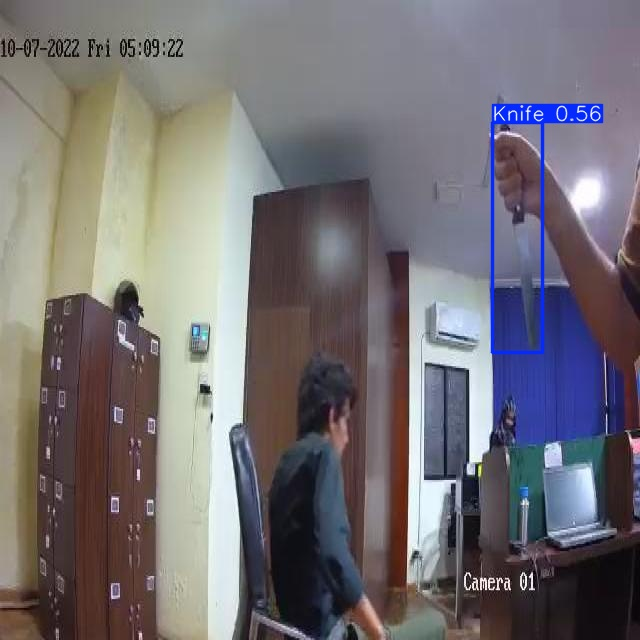

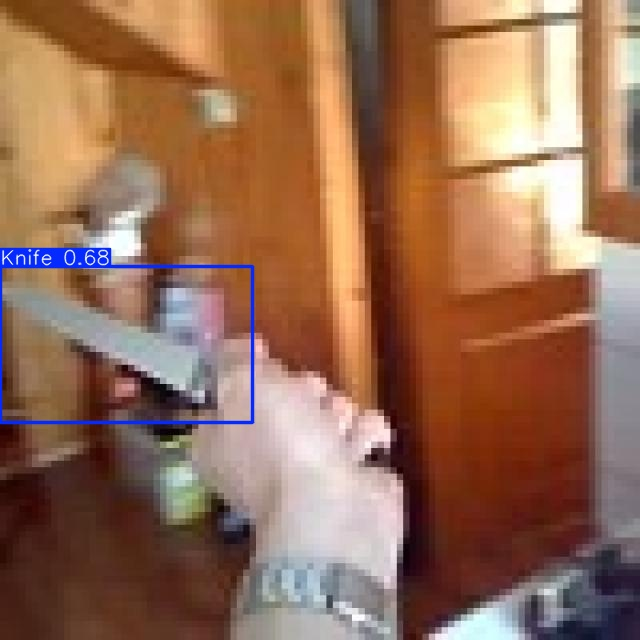

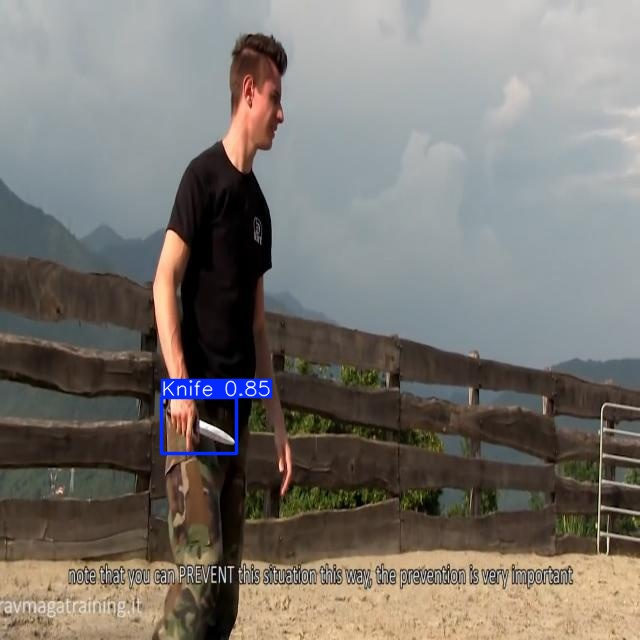

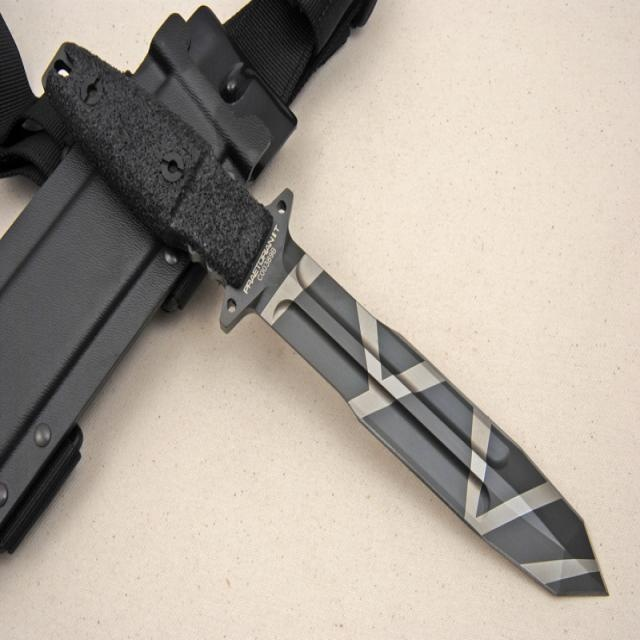

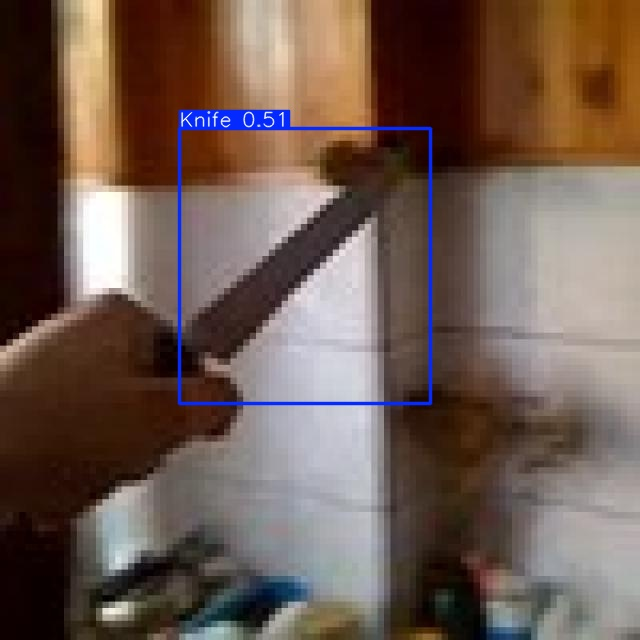

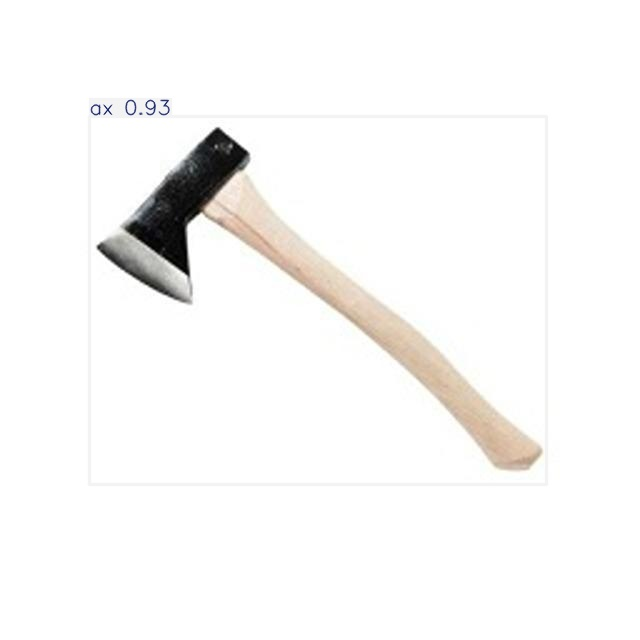

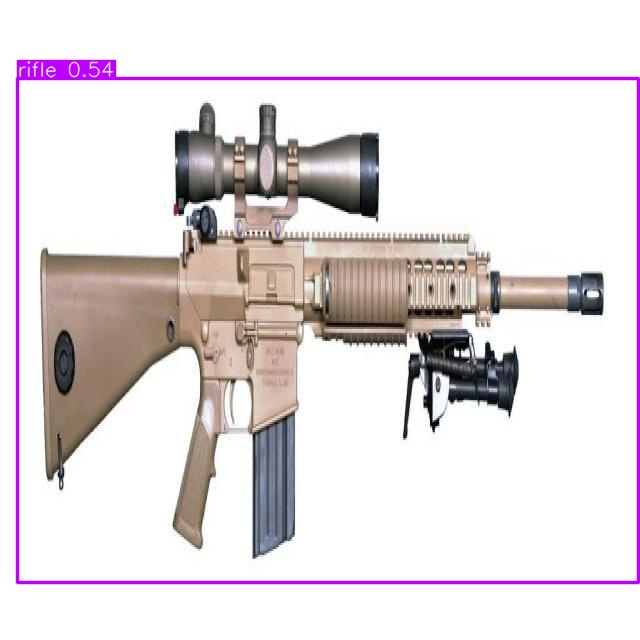

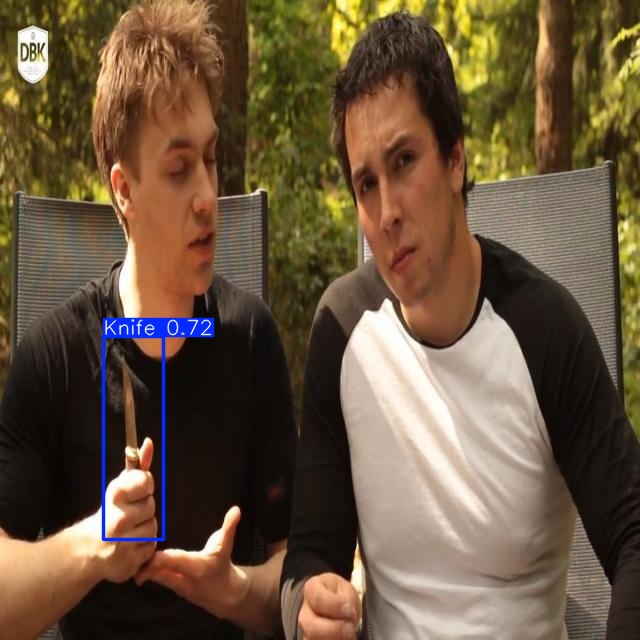

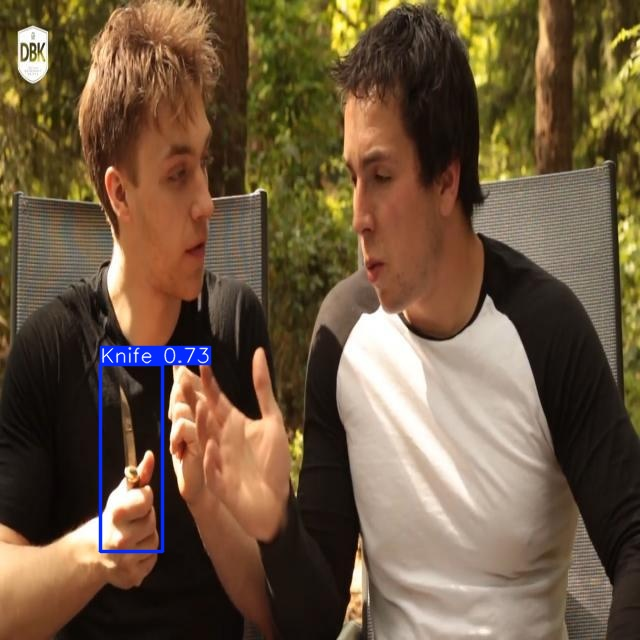

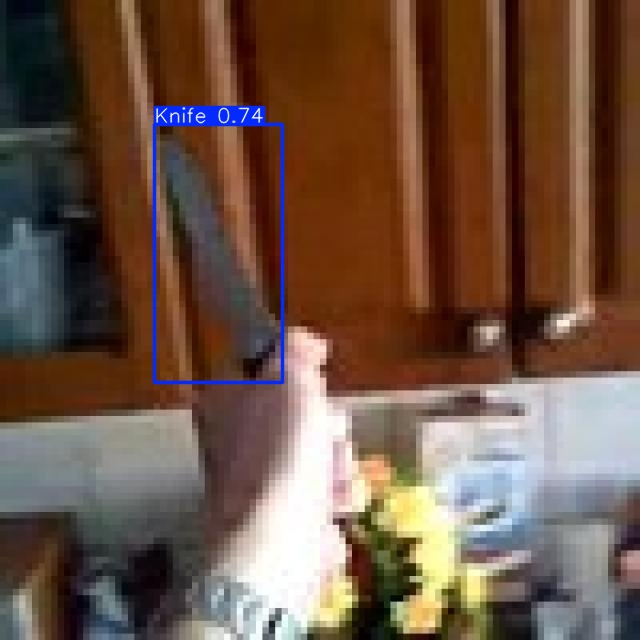

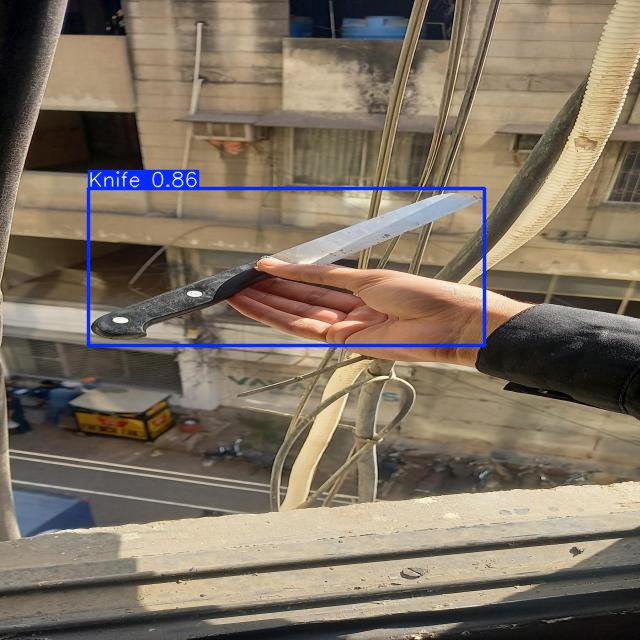

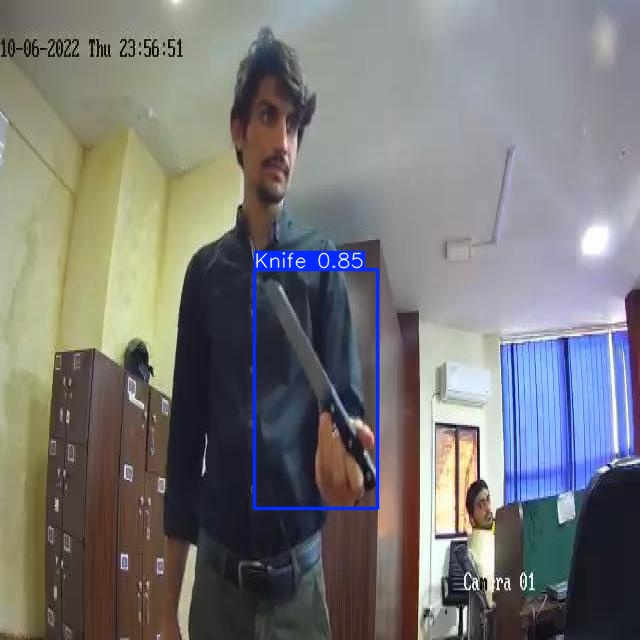

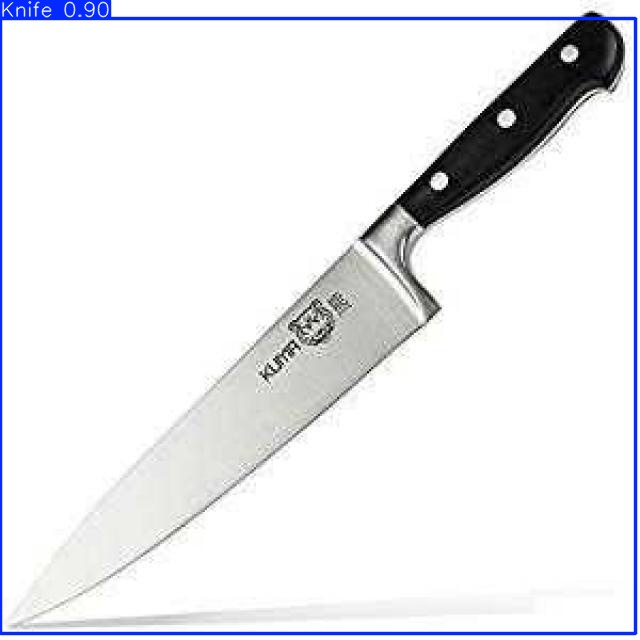

In [ ]:
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/content/runs/detect/predict/*.jpg"): #assuming JPG
    if i %25 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1

In [ ]:
import torch
import cv2

In [ ]:
import torch
import cv2


model = torch.load('/content/runs/detect/train/weights/best.pt')

from ultralytics import YOLO
model = YOLO('/content/yolo11n.pt')
cap = cv2.VideoCapture(0)


if not cap.isOpened():
    print("Error opening video stream or file")
    exit()


while(cap.isOpened()):

    ret, frame = cap.read()
    if ret:

        results = model(frame)

        cv2.imshow('Frame', results.render()[0])


        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

<ipython-input-1-1f727470173b>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('/content/runs/detect/train/weights/best.pt')


Error opening video stream or file
